In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
%matplotlib notebook
plt.style.use("ggplot")

In [5]:
df = pd.read_csv("life_expectancy.csv")

In [6]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
#information reguarding the columns:

# Status  - Developed or Developing status
# Life expectancy    -Life Expectancy in age                
# Adult Mortality   -Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)                 
# infant deaths     -Number of Infant Deaths per 1000 population                 
# Alcohol        -Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)                    
# percentage expenditure  -Expenditure on health as a percentage of Gross Domestic Product per capita(%)
# Hepatitis B       -Hepatitis B (HepB) immunization coverage among 1-year-olds (%)                 
# Measles          -Measles - number of reported cases per 1000 population                  
#  BMI        -Average Body Mass Index of entire population                       
# under-five deaths          -Number of under-five deaths per 1000 population        
# Polio           -Polio (Pol3) immunization coverage among 1-year-olds (%)                   
# Total expenditure         -General government expenditure on health as a percentage of total government expenditure (%)         
# Diphtheria     -Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)                    
#  HIV/AIDS      -Deaths per 1 000 live births HIV/AIDS (0-4 years)                    
# GDP          -Gross Domestic Product per capita (in USD)                      
# Population    -Population of the country                 
#  thinness  1-19 years        -Prevalence of thinness among children and adolescents for Age 10 to 19 (% )      
#  thinness 5-9 years            -Prevalence of thinness among children for Age 5 to 9(%)    
# Income composition of resources    -Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
# Schooling     -Number of years of Schooling(years)                     

In [7]:
df.shape

(2938, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [10]:
developing = df[df["Status"]== "Developing"]

In [11]:
developed = df[df["Status"]=="Developed"]

<IPython.core.display.Javascript object>


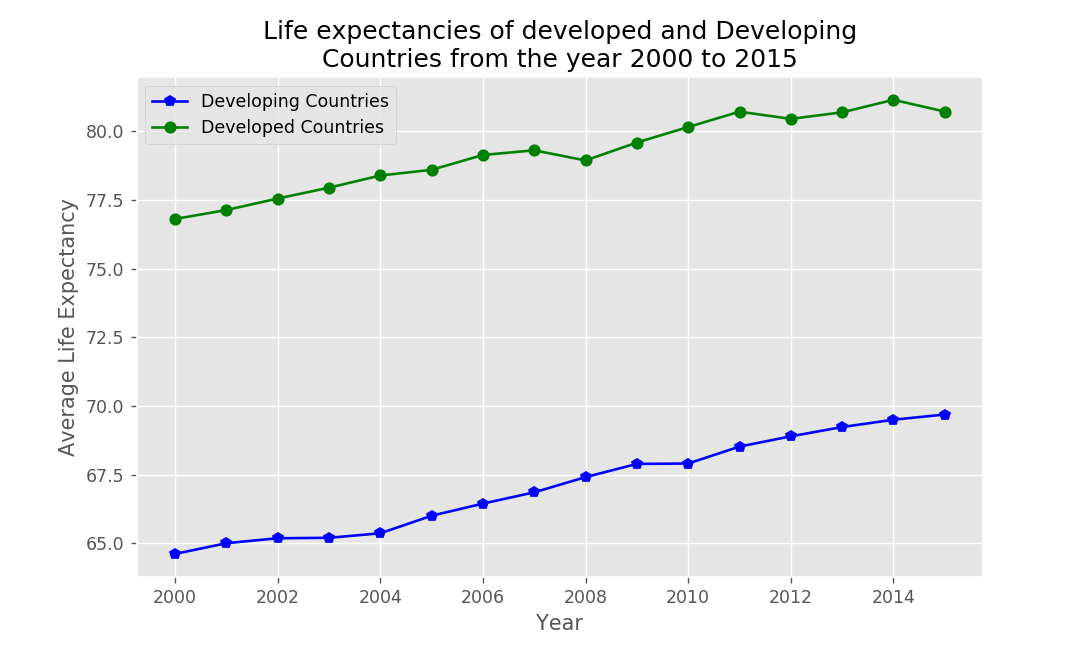

In [22]:
developing.groupby("Year").mean()["Life expectancy "].plot(kind = "line", color = "blue", marker = "p", label = "Developing Countries")
developed.groupby("Year").mean()["Life expectancy "].plot(kind = "line", color = "green", marker = "o", label = "Developed Countries")
plt.ylabel("Average Life Expectancy")
plt.title("Life expectancies of developed and Developing\nCountries from the year 2000 to 2015")
plt.legend()
plt.show()

### Average Life expectancy in Developed countries have remained about '12 years' more than that of developing countries, throughout these years. though it is clearly visible that Life Expectancies have increased gradually in both developed and developing countries.

In [29]:
a = np.array(df[df["Year"]==2015].sort_values("Life expectancy ", ascending = False).set_index("Country")["Life expectancy "].tail(15).values)


<IPython.core.display.Javascript object>


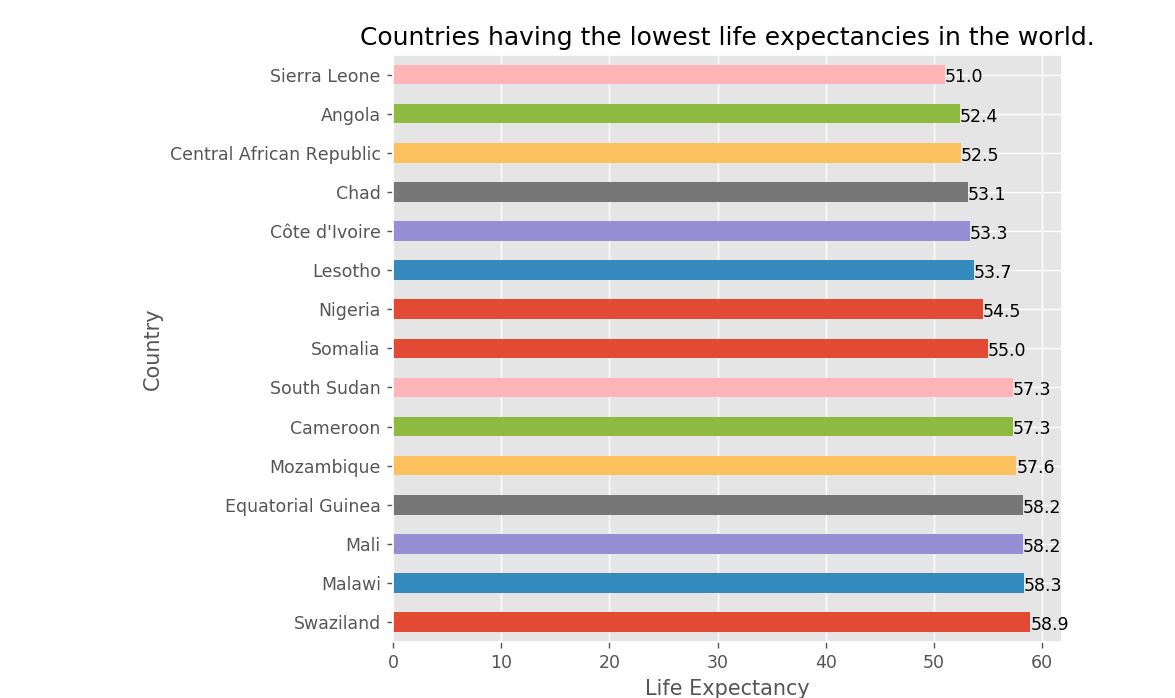

In [34]:
df[df["Year"]==2015].sort_values("Life expectancy ", ascending = False).set_index("Country")["Life expectancy "].tail(15).plot(kind = "barh")
plt.title("Countries having the lowest life expectancies in the world.")
for i,v in enumerate(a):
    plt.text(a[i],i-.2, v)
plt.tight_layout()
plt.xlabel("Life Expectancy")
plt.ylabel("Country")
plt.show()

### Note:All the countries are African. The shows that African countries need to take major steps towards establishing a proper healthcare facility in their countries.  

In [72]:
f = df[df["Year"]==2015][["Country","Life expectancy ", "Income composition of resources"]].sort_values("Life expectancy ",ascending = False)

<IPython.core.display.Javascript object>


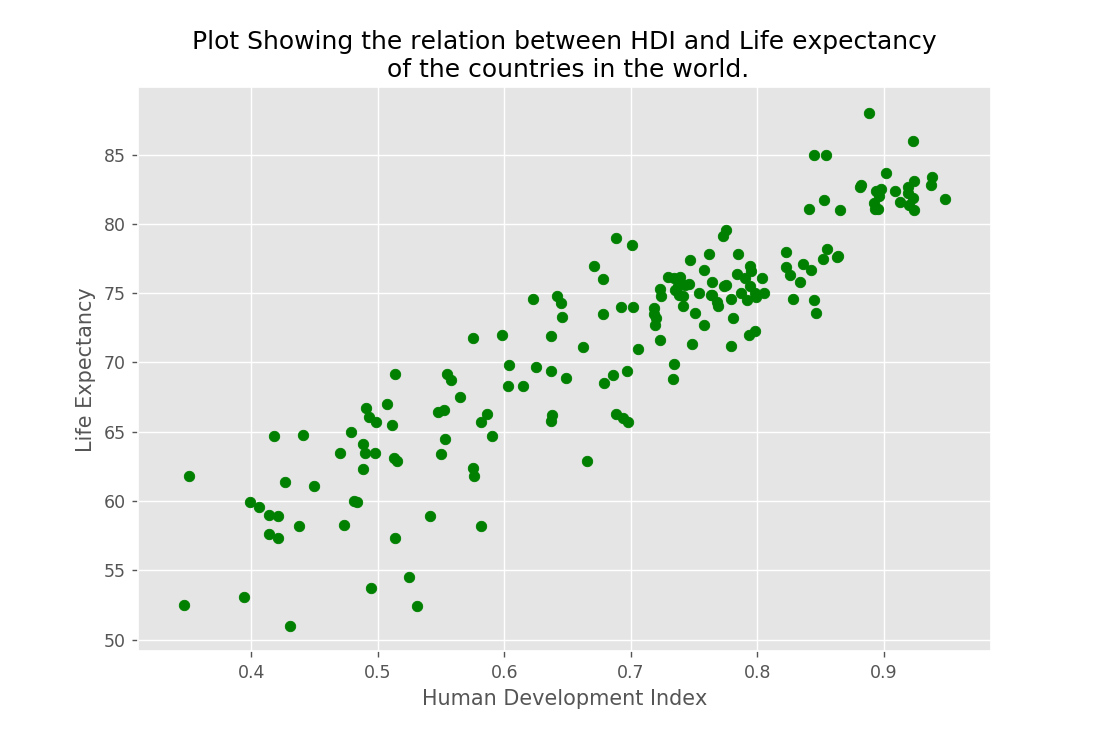

In [75]:
plt.scatter(f["Income composition of resources"],f["Life expectancy "] ,color = "green")
plt.title("Plot Showing the relation between HDI and Life expectancy\n of the countries in the world.")
plt.xlabel("Human Development Index")
plt.ylabel("Life Expectancy")
plt.show()

In [36]:
%matplotlib notebook

In [57]:
ind=ind[ind["Year"]>=2003]

<IPython.core.display.Javascript object>


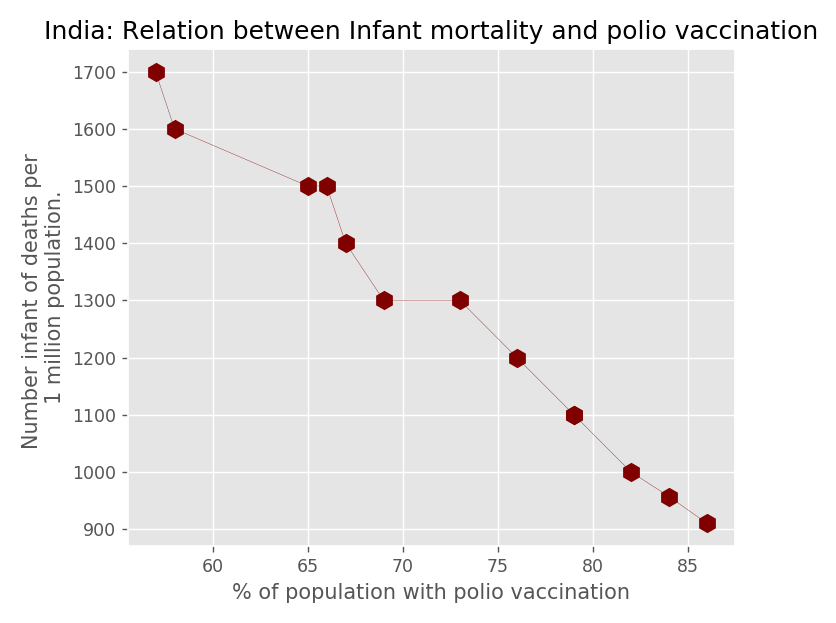

In [204]:
plt.plot(ind["Polio"], ind["infant deaths"],marker = "h", color = "maroon", linewidth =0.2, markersize =10)
plt.title("India: Relation between Infant mortality and polio vaccination")
plt.xlabel("% of population with polio vaccination")
plt.ylabel("Number infant of deaths per \n1 million population.")
plt.tight_layout()
plt.show()



### As the polio vaccination increases the number of infant deaths decreases in india.

In [63]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [141]:
f =df[df["Year"]==2015]

In [194]:
dev = f[f["GDP"]>=12000].sort_values('Income composition of resources', ascending = False).head(30)
undev = f[f["GDP"]<12000].sort_values('Income composition of resources', ascending = True).head(30)

In [200]:
undev= undev[undev[' thinness 5-9 years']<15]

<IPython.core.display.Javascript object>


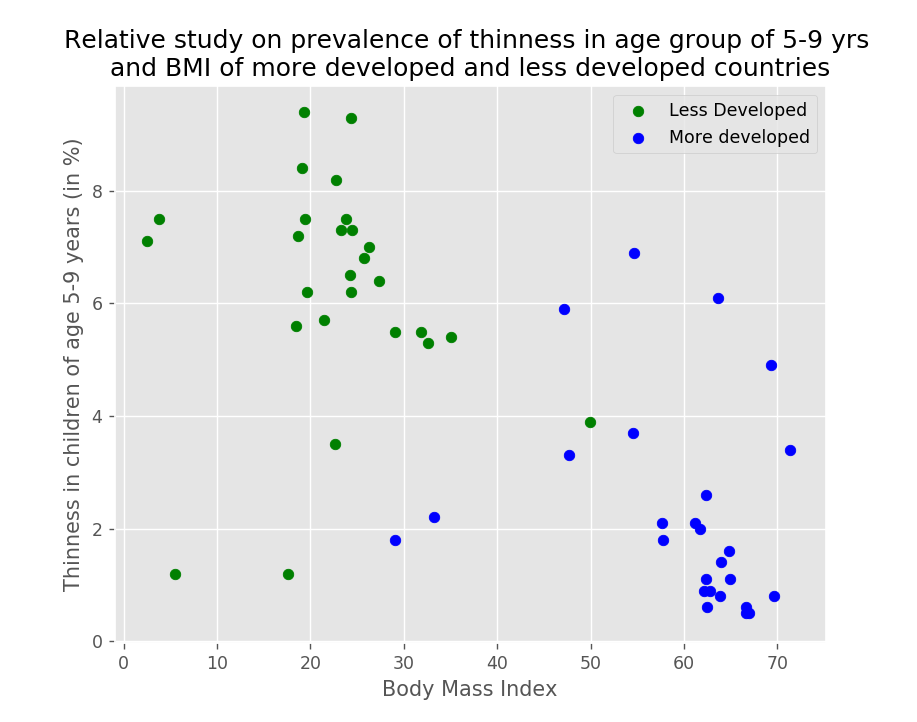

In [201]:
plt.scatter(undev[' BMI '],undev[' thinness 5-9 years'], color = "green",label = "Less Developed")
plt.scatter(dev[' BMI '],dev[' thinness 5-9 years'], color = "blue", label = "More developed")
plt.legend()
plt.xlabel("Body Mass Index")
plt.ylabel("Thinness in children of age 5-9 years (in %)")
plt.title("Relative study on prevalence of thinness in age group of 5-9 yrs \nand BMI of more developed and less developed countries")
plt.show()

### More developed countries tend to have higher body mass index and lower percentage of thinness in children on average than lesser developed countries.

In [10]:
china = df[df["Country"] == "China"]
usa = df[df["Country"] == "United States of America"]
india = df[df["Country"] == "India"]

In [15]:
def ch_gdp(a):
    if a<940:
        return a*10
    else:
        return a

In [16]:
china["GDP"] = china["GDP"].apply(ch_gdp)

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
def in_gdp(a):
    if a<20:
        return a*100
    elif a<90:
        return a*10
    else:
        return a

In [20]:
india["GDP"] = india["GDP"].apply(in_gdp)

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


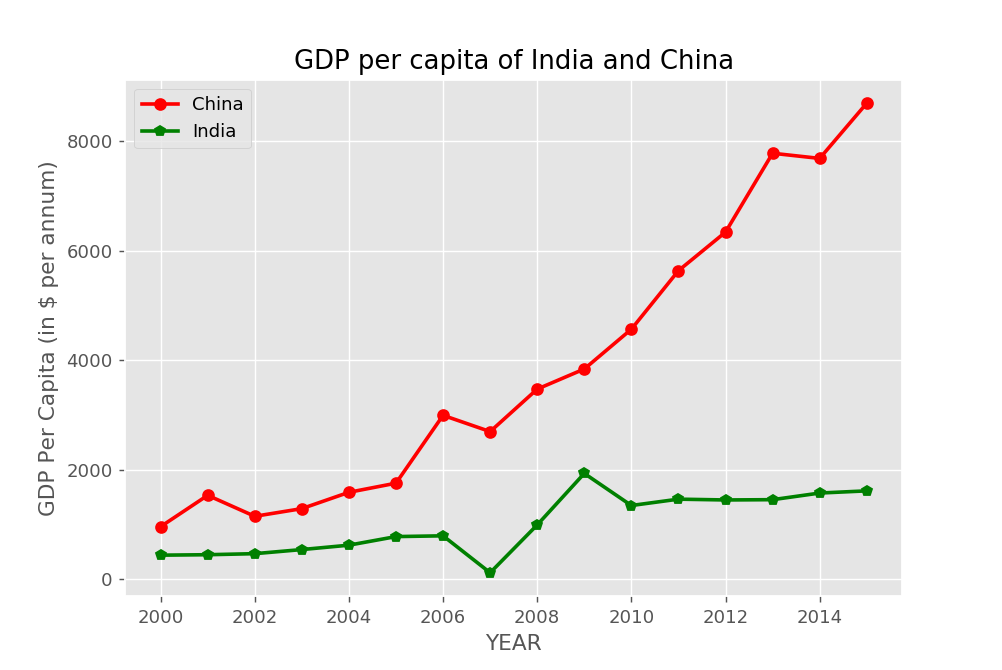

In [31]:
plt.plot(china["Year"], china["GDP"], color = "red", marker = 'o', linewidth = 2, label = "China")
plt.plot(india["Year"], india["GDP"], color = "green", marker = 'p', linewidth = 2 ,label = "India")
plt.xlabel("YEAR")
plt.ylabel("GDP Per Capita (in $ per annum)")
plt.title("GDP per capita of India and China")
plt.legend()
plt.show()

### GDP Per capita difference between these two countries was very small in 2000, but due to fast development and rapid industrial growth in China, the difference of GDP increased by a huge amount.
### In 2000 the GDP gap was only about  200 dollar , which leaped to about  6700 dollars in 2015

<IPython.core.display.Javascript object>


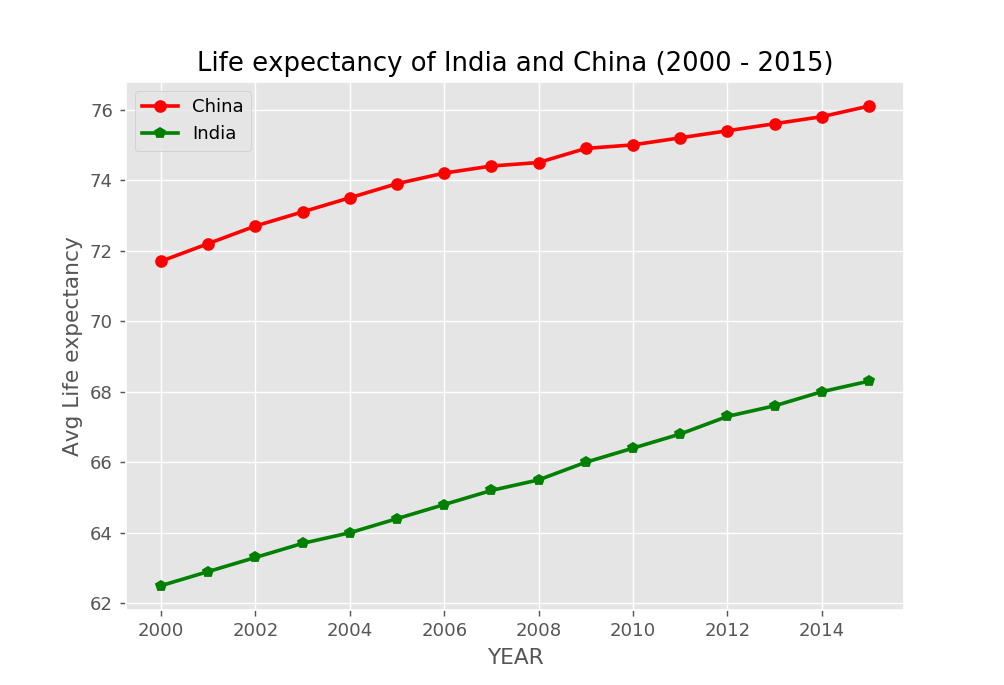

In [35]:
plt.plot(china["Year"], china["Life expectancy "], color = "red", marker = 'o', linewidth = 2, label = "China")
plt.plot(india["Year"], india["Life expectancy "], color = "green", marker = 'p', linewidth = 2 ,label = "India")
plt.xlabel("YEAR")
plt.ylabel("Avg Life expectancy")
plt.title("Life expectancy of India and China (2000 - 2015)")
plt.legend()
plt.show()

### China's Average Life Expectancy has always  remained higher than India. From 2000-2015 china's life expectancy grew by about 4 yrs and India's life expectancy grew by about 6 years.
### As of 2015 China's Life expectancy is about 76 yrs and India's is about 68 years/

In [40]:
a = np.array(df[df["Year"]==2015].sort_values("Life expectancy ", ascending = False).set_index("Country")["Life expectancy "].head(10).values)

<IPython.core.display.Javascript object>


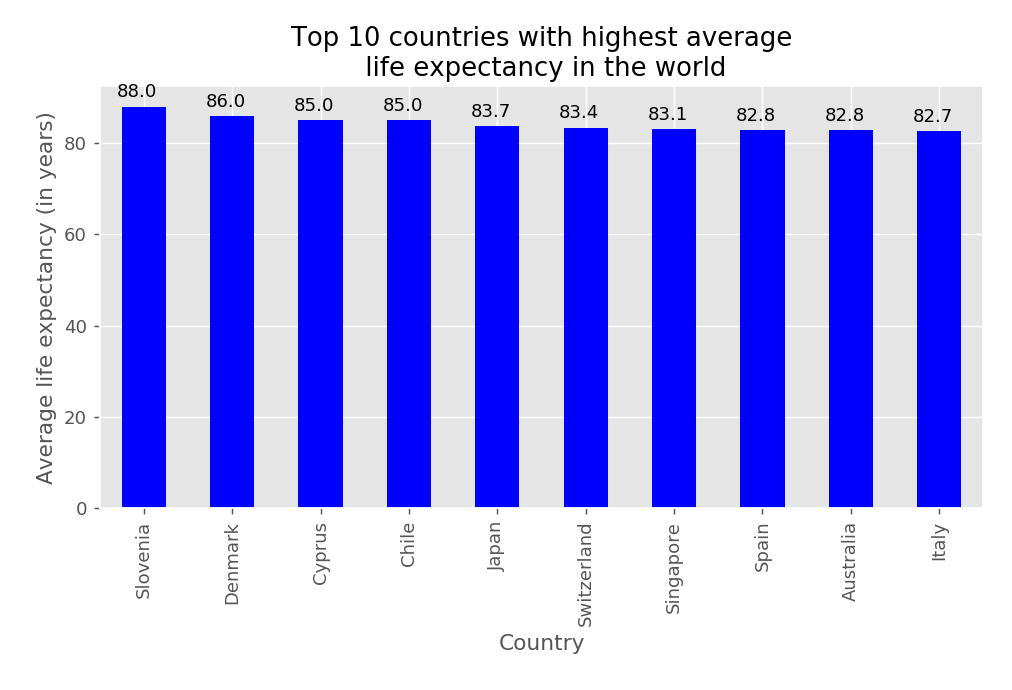

In [50]:
df[df["Year"]==2015].sort_values("Life expectancy ", ascending = False).set_index("Country")["Life expectancy "].head(10).plot(kind = "bar", color = "blue")
plt.xlabel("Country")
plt.ylabel("Average life expectancy (in years)")
plt.title("Top 10 countries with highest average\n life expectancy in the world")
for i,v in enumerate(a):
    plt.text(i-.3,v+2,a[i], fontsize = 10)
    
plt.tight_layout()    
plt.show()    

In [70]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [154]:
dev = df[df["Year"]==2014]
dev = dev[dev['Income composition of resources']>0.81].sort_values('Income composition of resources', ascending = False).head(60)
undev = df[df["Year"]==2014]
undev = undev[undev['Income composition of resources']<0.58].sort_values('Income composition of resources', ascending = True).head(70)

In [156]:
dev = dev[dev['Hepatitis B']>40]
undev = undev[undev['Hepatitis B']>40]

<IPython.core.display.Javascript object>


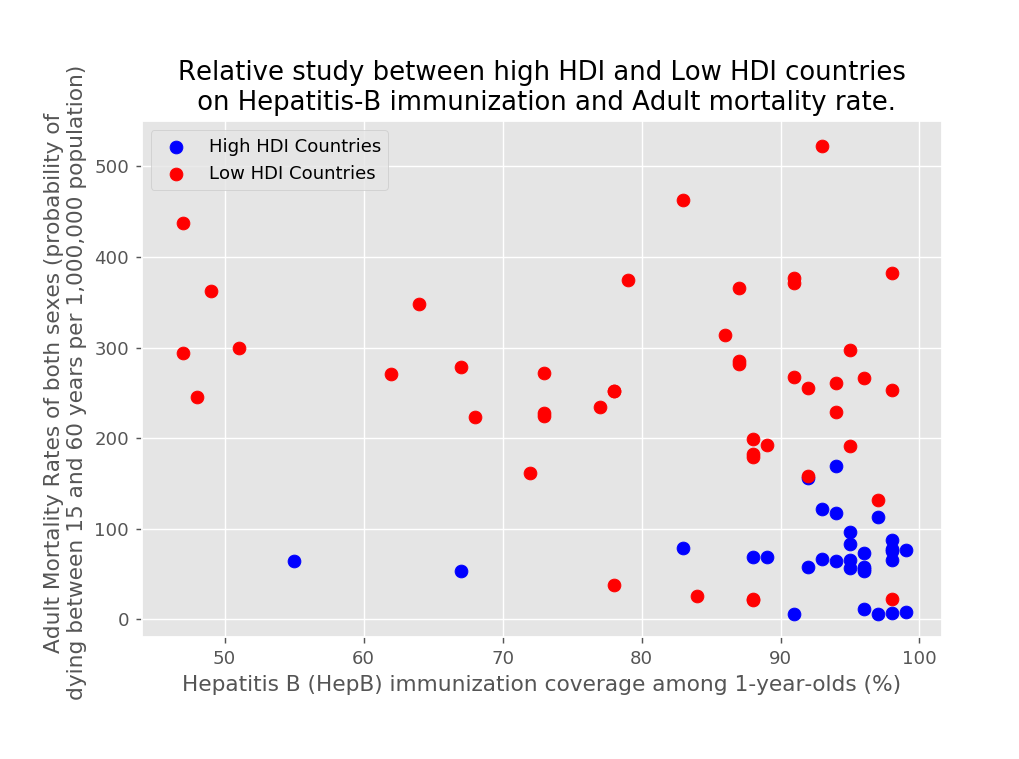

In [161]:
plt.scatter(dev['Hepatitis B'],dev[ 'Adult Mortality'], color = "blue", s =50, marker  = 'o',label = "High HDI Countries")
plt.scatter(undev['Hepatitis B'],undev[ 'Adult Mortality'], color = "red", s= 50, marker = 'o', label = "Low HDI Countries")
plt.xlabel('Hepatitis B (HepB) immunization coverage among 1-year-olds (%)')
plt.ylabel('Adult Mortality Rates of both sexes (probability of \ndying between 15 and 60 years per 1,000,000 population) ')
plt.title("Relative study between high HDI and Low HDI countries\n on Hepatitis-B immunization and Adult mortality rate.")
plt.legend()
plt.tight_layout()
plt.show()

### On Average, more percent of infants are immunized with Hep-B vaccine in High HDI countries compared to Low HDI countries.
### Also, adult mortality rate in High HDI countries are  lower than that of low HDI countries

In [162]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [198]:
immu = df.groupby("Year").mean()[['Hepatitis B','Polio','Diphtheria ']]

In [199]:
immu = immu.reset_index()

<IPython.core.display.Javascript object>


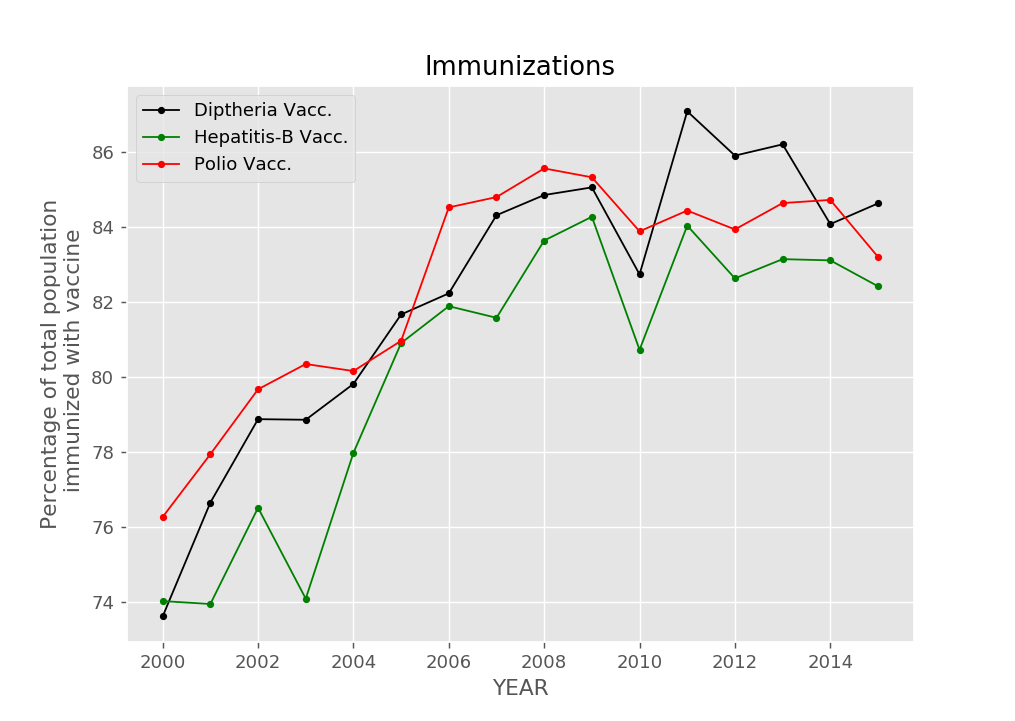

In [202]:
plt.plot(immu["Year"],immu['Diphtheria '], linewidth= 1, marker = 'o', color = "black", markersize = 3, label = "Diptheria Vacc.")
plt.plot(immu["Year"],immu['Hepatitis B'], linewidth= 1, marker = 'o', color = "green", markersize = 3, label = "Hepatitis-B Vacc.")
plt.plot(immu["Year"],immu['Polio'], linewidth= 1, marker = 'o', color = "red", markersize = 3, label = "Polio Vacc.")
plt.xlabel("YEAR")
plt.title("Immunizations")
plt.ylabel("Percentage of total population\n immunized with vaccine")
plt.legend()
plt.show()